<h1><center>Machine Learning Project : Classification</center></h1>

We start by importing our functions from the python file "binary.py" and matplotlib.pyplot in order to plot both datasets.

In [1]:
from binary import *
import matplotlib.pyplot as plt

## 1 - Import the data

We import both datasets (the Kidney disease dataset and The Banknote dataset) and we look at what they look like by using the function **head()**.

In [2]:
banknote_df = import_data(
    "datasets/data_banknote_authentication.txt",
    names=["variance", "skewness", "curtosis", "entropy", "classification"]
)
kidney_df = import_data("datasets/kidney_disease.csv", header=0, index_col=0, trash = ['\t',"?"])
print(banknote_df.head())
print(kidney_df.head())

   variance  skewness  curtosis  entropy  classification
0   3.62160    8.6661   -2.8073 -0.44699               0
1   4.54590    8.1674   -2.4586 -1.46210               0
2   3.86600   -2.6383    1.9242  0.10645               0
3   3.45660    9.5228   -4.0112 -3.59440               0
4   0.32924   -4.4552    4.5718 -0.98880               0
     age    bp     sg   al   su     rbc        pc         pcc          ba  \
id                                                                          
0   48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1    7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

      bgr  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
id         ...                                   

## 2 - Clean the data and perform preprocessing

Here we perform the cleaning and preprocessing of both datasets thanks to our function **clean_data()**. 

In [3]:
features_k, labels_k, T_k = clean_data(kidney_df)  #choix du dataset à étudier
features_b, labels_b, T_b = clean_data(banknote_df) 
name_col_k=list(features_k)
name_col_b=list(features_b)

X_k = features_k.to_numpy() #data
y_k = labels_k.to_numpy() #results

X_b = features_b.to_numpy() #data
y_b = labels_b.to_numpy() #results

### 2.1 - Plotting Kidney Data

Then, we plot in 2D the coordinates of data from the Kidney dataset. The coordinates that are plotted here are those which are considered as not discrete (in our case we defined our plot_data function so that we plot those which have more than eleven values). Otherwise there are too many plots and many of them are kind of not very interesting for our study. 

In [4]:
plt.figure(figsize=(20,20))
plot_data(features_k,labels_k,T_k)

**Comment** : We can see that for each 2D plot, a simple classification with a line could be made but it would be some errors because sometimes data are superposed and the separation is not completely linear. An SVM could be a quite good method to our classification problem though we may have to use a non-linear kernel to circumvent errors. We will also use logistic regression in order to compare both methods.

### 2.2 Plotting Bankotes Data

We also plot in 2D the coordinates of data from the Banknote dataset. The coordinates that are plotted here are those which are considered as not discrete (in our case we defined our plot_data function so that we plot those which have more than eleven values). Otherwise there are too many plots and many of them are kind of not very interesting for our study. 

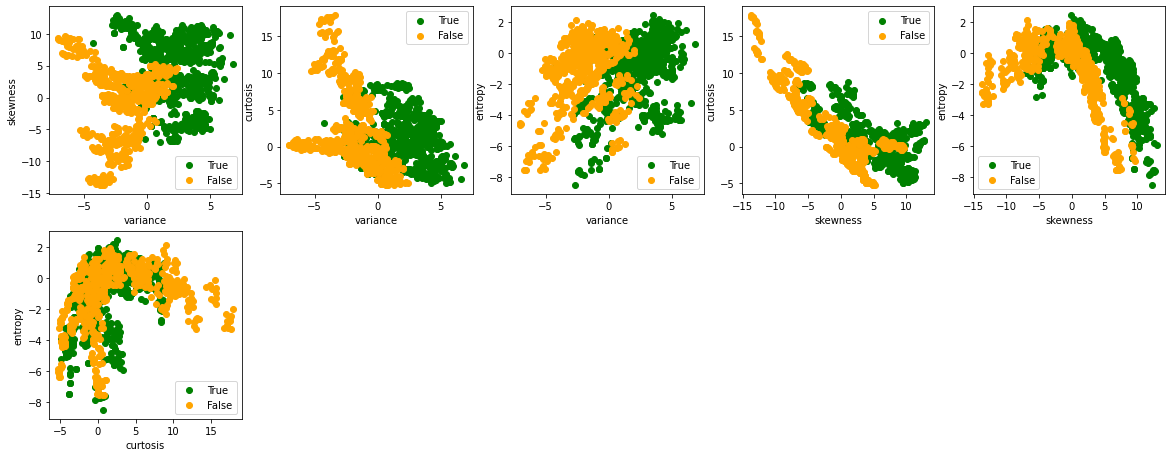

In [5]:
plt.figure(figsize=(20,20))
plot_data(features_b,labels_b,T_b)

**Comment** : We can see that for some 2D plots, a simple classification with a line could be made but for others it would be some errors because sometimes data are completly superposed and the separation is not linear. There are even some zones for example for $3^{rd}$ plot where green points are completly surrounded by orange points. Using an SVM with a linear kernel will not provide good results, that is why we will use a non linear kernel. We will also use logistic regression in order to compare both methods.

## 3 - Split the data

We randomly split both datasets and their labels in a training set and a test set and we normalise them thanks to our function **split()**.  

In [6]:
X_train_k, X_test_k, y_train_k, y_test_k = split(X_k,y_k)
X_train_b, X_test_b, y_train_b, y_test_b = split(X_b,y_b)

## 4 - Train and validation

We perform training and validation the same way for both Kidney and Banknote dataset : 

* we use two methods : Logistic Regression and SVM with RBF kernel
* we apply two feature selection methods to both datasets : PCA and correlation feature selection 

### 4.1 Kidney

We start by doing it for the Kidney dataset.

### 4.1.1 - Feature selection 

We apply two feature selection methods to both datasets : **PCA** and **correlation** feature selection. For correlation feature selection, we keep the features which are correlated with the classification result.  
We obviously reduce the features of our dataset in accordance with the training test.

In [7]:
X_train_reduced_k_pca,X_test_reduced_k_pca,_ = PCA_reduced(X_train_k,X_test_k)
X_train_reduced_k_corr,X_test_reduced_k_corr,_ = feature_correlation(X_train_k,y_train_k,X_test_k,name_col_k,value=0.01)

### 4.1.2 - Train

In [8]:
clf_k_Log_corr,train_k_Log_corr =training_logistic(X_train_reduced_k_corr,y_train_k)
clf_k_SVM_corr,train_k_SVM_corr =training_SVM(X_train_reduced_k_corr,y_train_k)
clf_k_Log_pca,train_k_Log_pca =training_logistic(X_train_reduced_k_pca,y_train_k)
clf_k_SVM_pca,train_k_SVM_pca =training_SVM(X_train_reduced_k_pca,y_train_k)
print(f'Accuracy for training set with SVM with correlation feature reduction: {train_k_SVM_corr:.2f}')
print(f'Accuracy for training set with logistic regression with correlation feature reduction: {train_k_Log_corr:.2f}')
print(f'Accuracy for training set with SVM with PCA: {train_k_SVM_pca:.2f}')
print(f'Accuracy for training set with logistic regression with PCA: {train_k_Log_pca:.2f}')

Accuracy for training set with SVM with correlation feature reduction: 1.00
Accuracy for training set with logistic regression with correlation feature reduction: 1.00
Accuracy for training set with SVM with PCA: 1.00
Accuracy for training set with logistic regression with PCA: 1.00


### 4.1.3 Validation

In [9]:
print(f'Accuracy for test set with SVM with correlation feature reduction: {accuracy_score(y_test_k,clf_k_SVM_corr.predict(X_test_reduced_k_corr)):.2f}')
print(f'Accuracy for test set with logistic regression with correlation feature reduction: {accuracy_score(y_test_k,clf_k_Log_corr.predict(X_test_reduced_k_corr)):.2f}')
print(f'Accuracy for test set with SVM with PCA: {accuracy_score(y_test_k,clf_k_SVM_pca.predict(X_test_reduced_k_pca)):.2f}')
print(f'Accuracy for test set with logistic regression with PCA: {accuracy_score(y_test_k,clf_k_Log_pca.predict(X_test_reduced_k_pca)):.2f}')

Accuracy for test set with SVM with correlation feature reduction: 1.00
Accuracy for test set with logistic regression with correlation feature reduction: 1.00
Accuracy for test set with SVM with PCA: 1.00
Accuracy for test set with logistic regression with PCA: 1.00


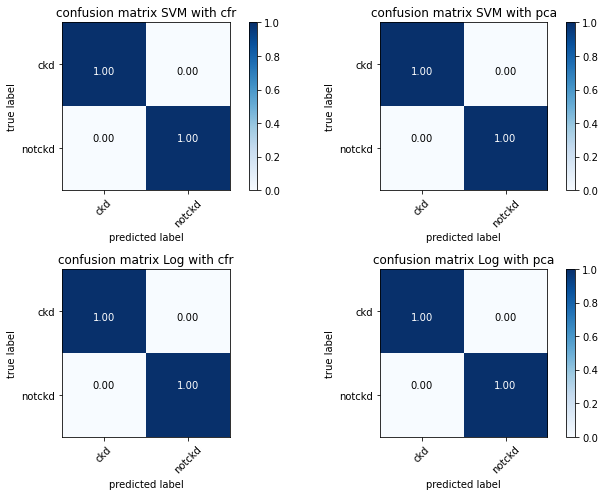

In [10]:
plt.figure(figsize = (10,7))
plt.subplot(221)
plot_confusion_matrix(X_test_reduced_k_corr,y_test_k,clf_k_SVM_corr,T_k,'confusion matrix SVM with cfr')
plt.subplot(222)
plot_confusion_matrix(X_test_reduced_k_pca,y_test_k,clf_k_SVM_pca,T_k,'confusion matrix SVM with pca')
plt.subplot(223)
plot_confusion_matrix(X_test_reduced_k_corr,y_test_k,clf_k_Log_corr,T_k,'confusion matrix Log with cfr')
plt.subplot(224)
plot_confusion_matrix(X_test_reduced_k_pca,y_test_k,clf_k_Log_pca,T_k,'confusion matrix Log with pca')

**Comment** : 

* The classification accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples. Here we have an accuracy of 1.0 for the training and validation sets which means that all the predictions made are correct. However, though all our predictions are correct, that does not mean that the prediction for any data would be correct and also, as the decision depends on the data and the data here are complex to measure, there could be predicitions errors coming from how the measures were done. For example if they were badly done or if new tools would be introduce to measure the data. 


* The confusion matrix here allows to visualise the prediction results but do not bring other information because there is no error (there is no confusion here). 

## 4.2 Banknote

Then we do it for the Banknote dataset.

### 4.2.1 - Feature selection 

We apply two feature selection methods to both datasets : **PCA** and **correlation** feature selection. For correlation feature selection, we keep the features which are correlated with the classification result.  
We obviously reduce the features of our dataset in accordance with the training test.

In [11]:
X_train_reduced_b_pca,X_test_reduced_b_pca,_ = PCA_reduced(X_train_b,X_test_b)
X_train_reduced_b_corr,X_test_reduced_b_corr,_ = feature_correlation(X_train_b,y_train_b,X_test_b,name_col_b,value=0.01)

### 4.2.2 - Train

In [12]:
clf_b_Log_corr,train_b_Log_corr =training_logistic(X_train_reduced_b_corr,y_train_b)
clf_b_SVM_corr,train_b_SVM_corr =training_SVM(X_train_reduced_b_corr,y_train_b)
clf_b_Log_pca,train_b_Log_pca =training_logistic(X_train_reduced_b_pca,y_train_b)
clf_b_SVM_pca,train_b_SVM_pca =training_SVM(X_train_reduced_b_pca,y_train_b)
print(f'Accuracy for training set with SVM with correlation feature reduction: {train_b_SVM_corr:.2f}')
print(f'Accuracy for training set with logistic regression with correlation feature reduction: {train_b_Log_corr:.2f}')
print(f'Accuracy for training set with SVM with PCA: {train_b_SVM_pca:.2f}')
print(f'Accuracy for training set with logistic regression with PCA: {train_b_Log_pca:.2f}')

Accuracy for training set with SVM with correlation feature reduction: 1.00
Accuracy for training set with logistic regression with correlation feature reduction: 0.98
Accuracy for training set with SVM with PCA: 0.94
Accuracy for training set with logistic regression with PCA: 0.92


### 4.2.3 - Validation

In [13]:
print(f'Accuracy for test set with SVM with correlation feature reduction: {accuracy_score(y_test_b,clf_b_SVM_corr.predict(X_test_reduced_b_corr)):.2f}')
print(f'Accuracy for test set with logistic regression with correlation feature reduction: {accuracy_score(y_test_b,clf_b_Log_corr.predict(X_test_reduced_b_corr)):.2f}')
print(f'Accuracy for test set with SVM with PCA: {accuracy_score(y_test_b,clf_b_SVM_pca.predict(X_test_reduced_b_pca)):.2f}')
print(f'Accuracy for test set with logistic regression with PCA: {accuracy_score(y_test_b,clf_b_Log_pca.predict(X_test_reduced_b_pca)):.2f}')

Accuracy for test set with SVM with correlation feature reduction: 1.00
Accuracy for test set with logistic regression with correlation feature reduction: 0.99
Accuracy for test set with SVM with PCA: 0.93
Accuracy for test set with logistic regression with PCA: 0.92


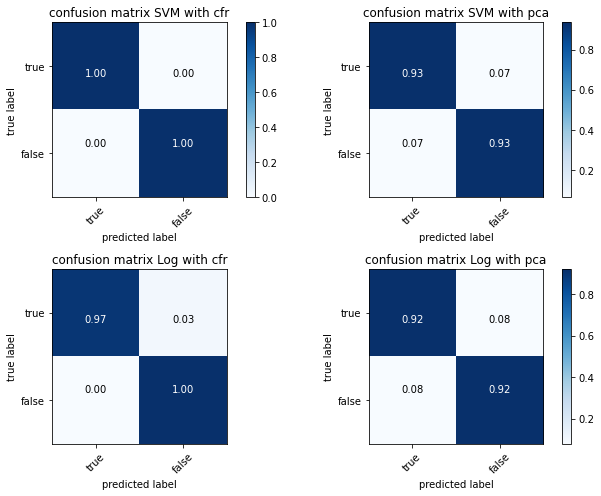

In [14]:
plt.figure(figsize = (10,7))
plt.subplot(221)
plot_confusion_matrix(X_test_reduced_b_corr,y_test_b,clf_b_SVM_corr,T_b,'confusion matrix SVM with cfr')
plt.subplot(222)
plot_confusion_matrix(X_test_reduced_b_pca,y_test_b,clf_b_SVM_pca,T_b,'confusion matrix SVM with pca')
plt.subplot(223)
plot_confusion_matrix(X_test_reduced_b_corr,y_test_b,clf_b_Log_corr,T_b,'confusion matrix Log with cfr')
plt.subplot(224)
plot_confusion_matrix(X_test_reduced_b_pca,y_test_b,clf_b_Log_pca,T_b,'confusion matrix Log with pca')

**Comment** : 

* The classification accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples. Here we have an accuracy of 1.0 for SVM classification with correlation feature selection. The conclusions are then the same than for the Kidney disease dataset.


* We note that here, according to the selected feature selection method and the classification method used, we do not obtain similar results, contrary to the previous case. Here the use of confusion matrices is therefore wise.


* We observe that with PCA, we have much false negative result which could lead to the idea that PCA is not necessarily a good feature selection method here. Indeed in our case we use a PCA with 0.95 variance so we lose some information. This loss of information may explain the lower results.